# Stocks Clustering

### Context

Maintaining a diversified portfolio when investing in stocks is a popular option for investors in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. 

Using the provided data and a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help an investor better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.

### Objective

This dataset contains information on stock price and some financial indicators for a few companies listed under the New York Stock Exchange. The data will be analyzed in order to be grouped the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary
- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Security: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

from sklearn.preprocessing import StandardScaler

from scipy.spatial.distance import cdist, pdist

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

In [2]:
#importing data
data = pd.read_csv("stock_data.csv")
data.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


# Data Overview

In [3]:
#number of rows and columns in train data
data.shape

(340, 15)

- The dataset consists of 340 rows with 15 columns (15 variables). 

In [4]:
#data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

- There are 4 columns containing object type data (strings of characters). 
- The rest of the columns contain float and integer type data (numerical). 

In [5]:
#creating a copy of the training data and test data to not mess up the original datasets
df = data.copy()

In [6]:
#checking for null values
df.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

- There are no null values within any of the variables.

In [7]:
#checking for duplicated data
df[df.duplicated()].count()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

- There are no duplicate values within the dataset. 

# EDA
**Leading Questions**:
1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

In [8]:
df.describe().T
#.T transposes the data (switched rows and columns) to make the table easier to read

,count,mean,std,min,25%,50%,75%,max
Current Price,340.0,8.086234e+01,9.805509e+01,4.500000e+00,3.855500e+01,5.970500e+01,9.288000e+01,1.274950e+03
Price Change,340.0,4.078194e+00,1.200634e+01,-4.712969e+01,-9.394838e-01,4.819505e+00,1.069549e+01,5.505168e+01
Volatility,340.0,1.525976e+00,5.917984e-01,7.331632e-01,1.134878e+00,1.385593e+00,1.695549e+00,4.580042e+00
ROE,340.0,3.959706e+01,9.654754e+01,1.000000e+00,9.750000e+00,1.500000e+01,2.700000e+01,9.170000e+02
Cash Ratio,340.0,7.002353e+01,9.042133e+01,0.000000e+00,1.800000e+01,4.700000e+01,9.900000e+01,9.580000e+02
Net Cash Flow,340.0,5.553762e+07,1.946365e+09,-1.120800e+10,-1.939065e+08,2.098000e+06,1.698108e+08,2.076400e+10
Net Income,340.0,1.494385e+09,3.940150e+09,-2.352800e+10,3.523012e+08,7.073360e+08,1.899000e+09,2.444200e+10
Earnings Per Share,340.0,2.776662e+00,6.587779e+00,-6.120000e+01,1.557500e+00,2.895000e+00,4.620000e+00,5.009000e+01
Estimated Shares Outstanding,340.0,5.770283e+08,8.458496e+08,2.767216e+07,1.588482e+08,3.096751e+08,5.731175e+08,6.159292e+09
P/E Ratio,340.0,3.261256e+01,4.434873e+01,2.935451e+00,1.504465e+01,2.081988e+01,3.176476e+01,5.280391e+02


- The table above shows the count, average, standard deviation, inter quartile ranges, minimum, and maximums for each numerical variable.

## Univariate Analysis

In [9]:
# function to plot a boxplot and a histogram - numerical variables

def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

- histogram_boxplot will be used for: 
    - Current Price
    - Price Change
    - Volatility
    - ROE
    - Cash Ratio
    - Net Cash Flow
    - Net Income
    - Earnings Per Share
    - Estimated Shares Outstanding
    - P/E Ratio
    - P/B Ratio

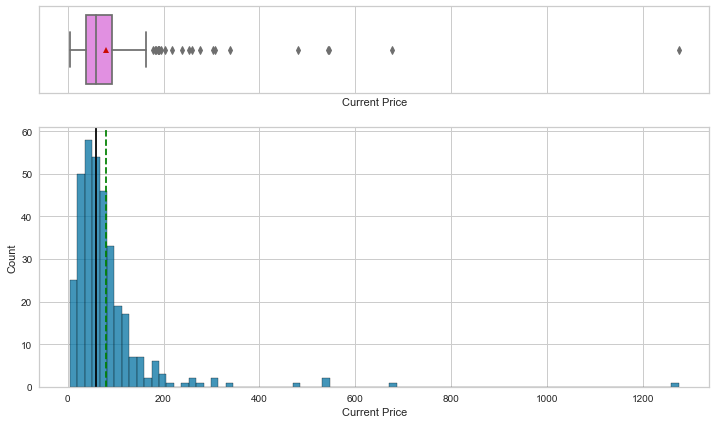

In [10]:
histogram_boxplot(df, "Current Price")

<b>1. What does the distribution of stock prices look like?</b>
- The current stock prices is very right-skewed. 
- Prices range from just over 0 dollars all the way up to over 1200 dollars at the maximum. This data seems to be very influenced by a few outliers. A majority of stocks are priced under 200 dollars. 

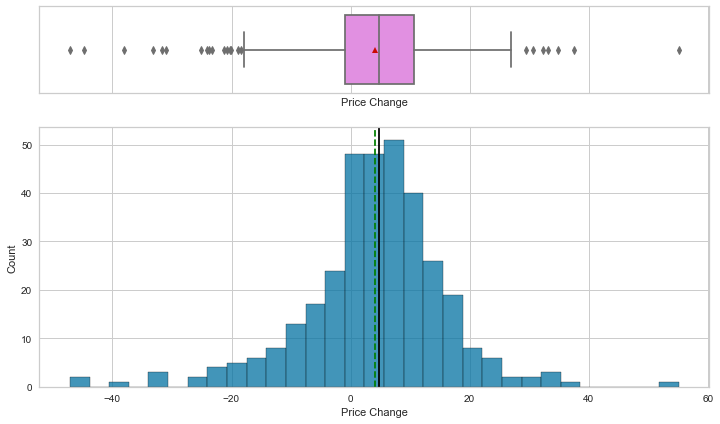

In [11]:
histogram_boxplot(df, "Price Change")

- The percentage change in price seen over the course of 13 weeks is approximately normally distributed. 
- The percent changes range from approximately -50% up to +50%.
- The majority of the percent price changes falls between 0-10%. 
- There are a few outliers visible. 

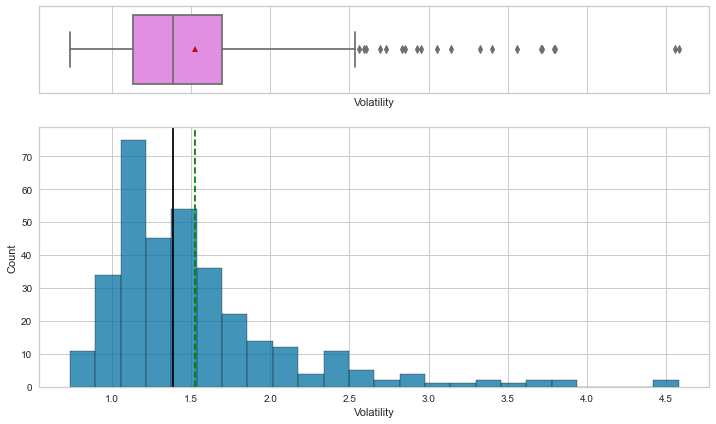

In [12]:
histogram_boxplot(df, "Volatility")

- The volatility of the stocks (standard deviation of the stock prices over the past 13 weeks) is slightly right skewed. This data is slightly influenced by a few outliers. 
- The majority volatility values falls between 1-2 (standard deviations).
- The volatility values range from 0.5 to 4.5. 

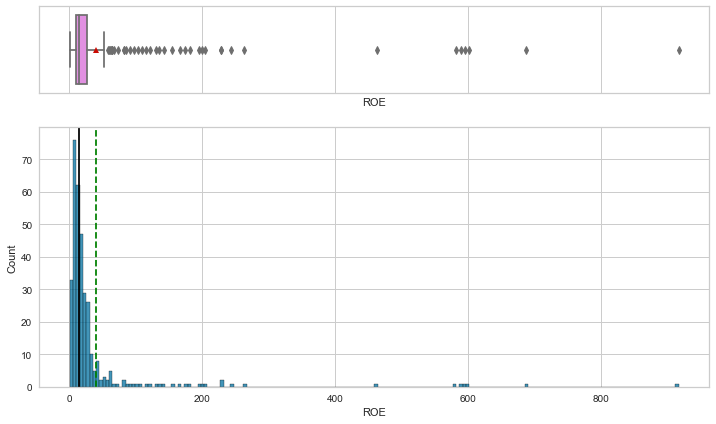

In [13]:
histogram_boxplot(df, "ROE")

- The ROE values are very right skewed. This data is heavily influenced by the presence of a few outliers pulling the distribution to the right. 
- The vast majority of ROE values is centered around 0 to ~75. 
- Overall, the ROE values range from 0 to over 800. 

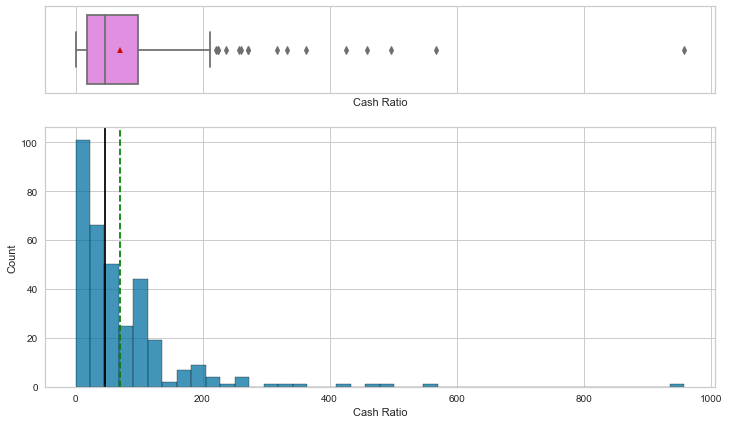

In [14]:
histogram_boxplot(df, "Cash Ratio")

- The cash ratio values are also very right skewed and affected by a few outliers. 
- The majority of cash ratio values are centered between 0 and 100. 
- The cash ratio values range from 0 up to approximately 900. 

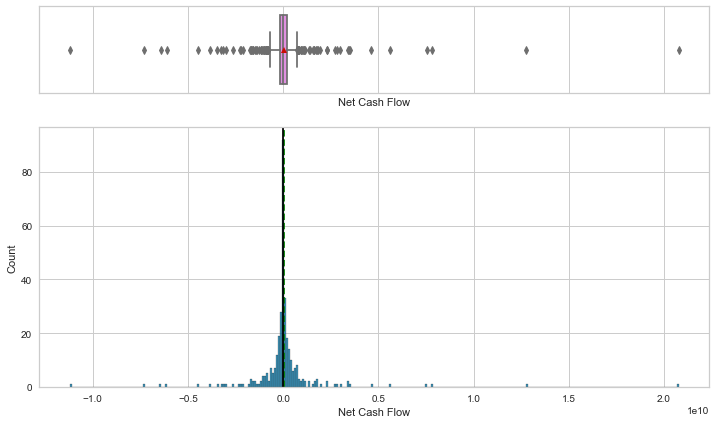

In [15]:
histogram_boxplot(df, "Net Cash Flow")

- The overall net cash flow distribution is normal. 
- The net cash flows among all of the companies ranges from less than -1.0 $e^{10}$ up to over 2.0 $e^{10}$. This data is also very influenced by a few outliers. 
- The majority of net cash flow values are centered around 0.0.

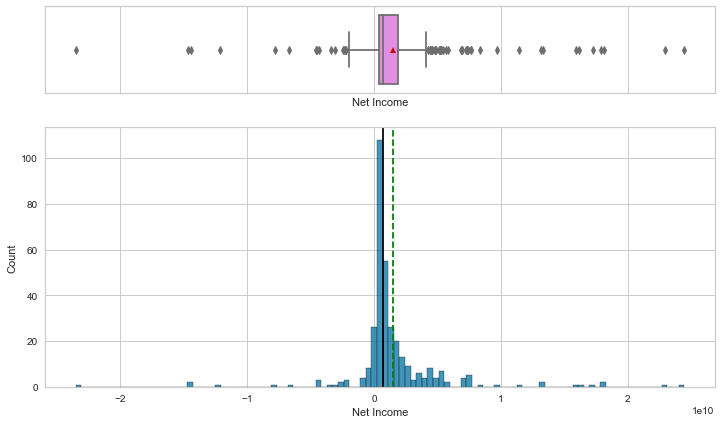

In [16]:
histogram_boxplot(df, "Net Income")

- The distrubution of net incomes is approximately normally distributed. 
- The vast majority of net incomes are just barely over 0. 
- The net incomes seen range from less than -2 $e^{10}$ all the way up to over +2 $e^{10}$.

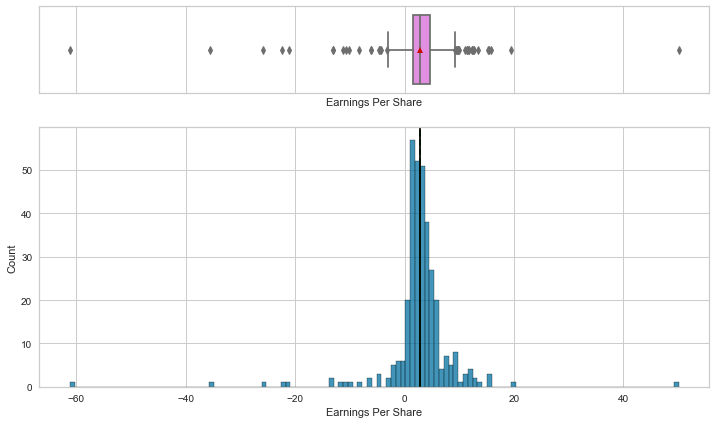

In [17]:
histogram_boxplot(df, "Earnings Per Share")

- Earnings per share range from less than -60 dollars to approximately 50 dollars. 
- The distribution is approximately normal. 
- The majority of earnings per share are between 0 and 10 dollars. 

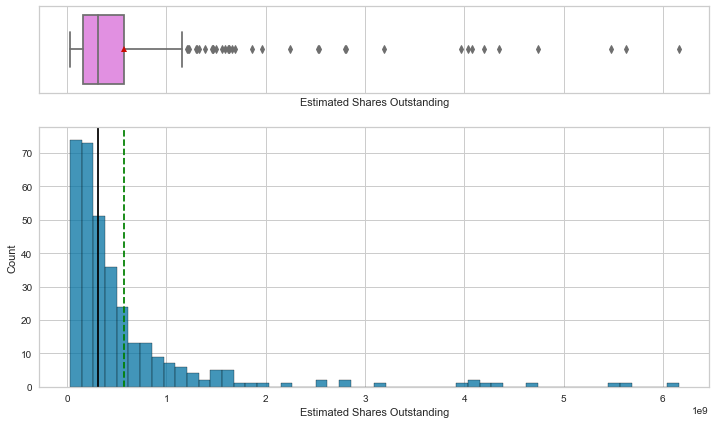

In [18]:
histogram_boxplot(df, "Estimated Shares Outstanding")

- The distribution of estimated shares outstanding is right skewed. 
- The majority of outstanding shares held falls between 0 and 1. 
- The data is influenced by some outliers. 

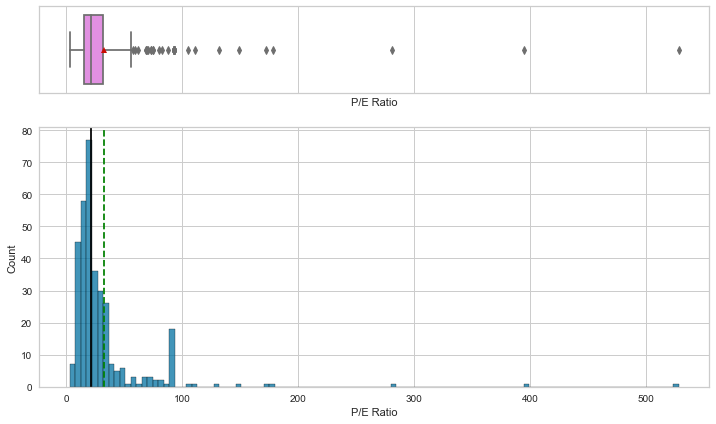

In [19]:
histogram_boxplot(df, "P/E Ratio")

- The distribution of P/E ratios is slightly right skewed. 
- This data is also heavily influenced by some very large outliers. 
- The P/E ratios range from just over 0 all the way up to over 500. 
- The majority of P/E ratios fall between 0 and 40. 

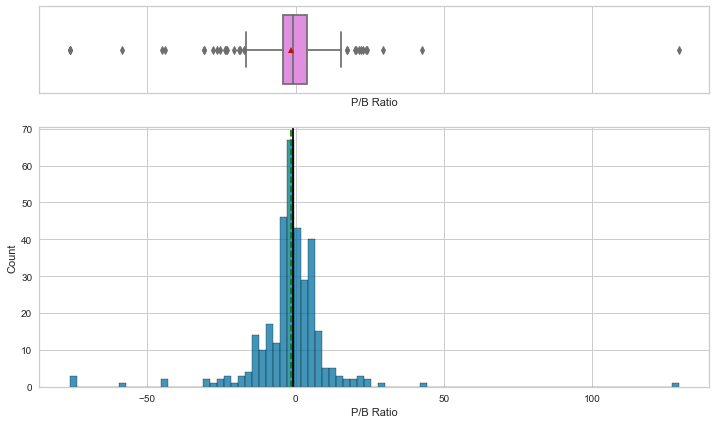

In [20]:
histogram_boxplot(df, "P/B Ratio")

- The distribution of P/B ratio values is approximately normal. 
- There are a few very large outliers present. 
- The P/B ratio values range from below -50 to over 100. 
- The majority of P/B ratio values fall between -20 to +20. 

In [21]:
# function to create labeled barplots - categorical variables

def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

- labeled_barplot will be used for: 
    - GICS Sector
    - GICS Sub Industry

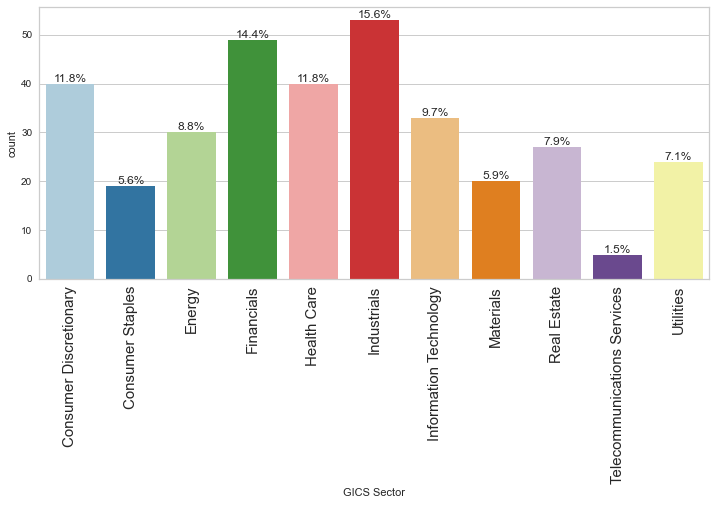

In [22]:
labeled_barplot(df, "GICS Sector", perc=True)

- The most common GICS sector is industrials, representing 15.6% of the observations. 
- The least common sector is telecom services, representing 1.5%. 

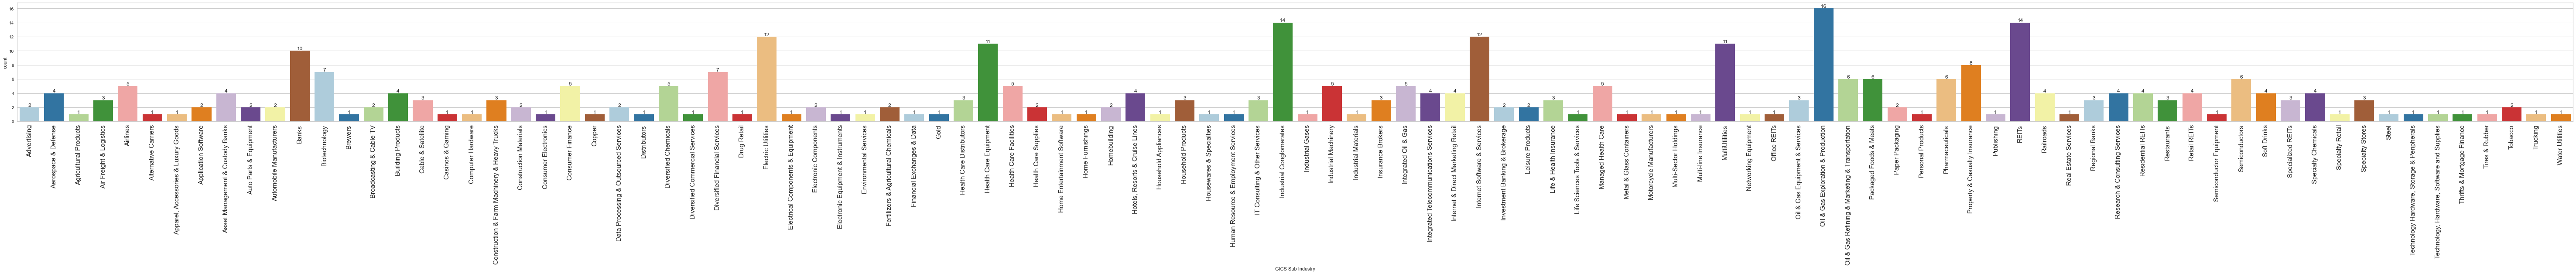

In [23]:
labeled_barplot(df, "GICS Sub Industry")

We will take a subsample of the sub industries to get a better idea of this data (below). 

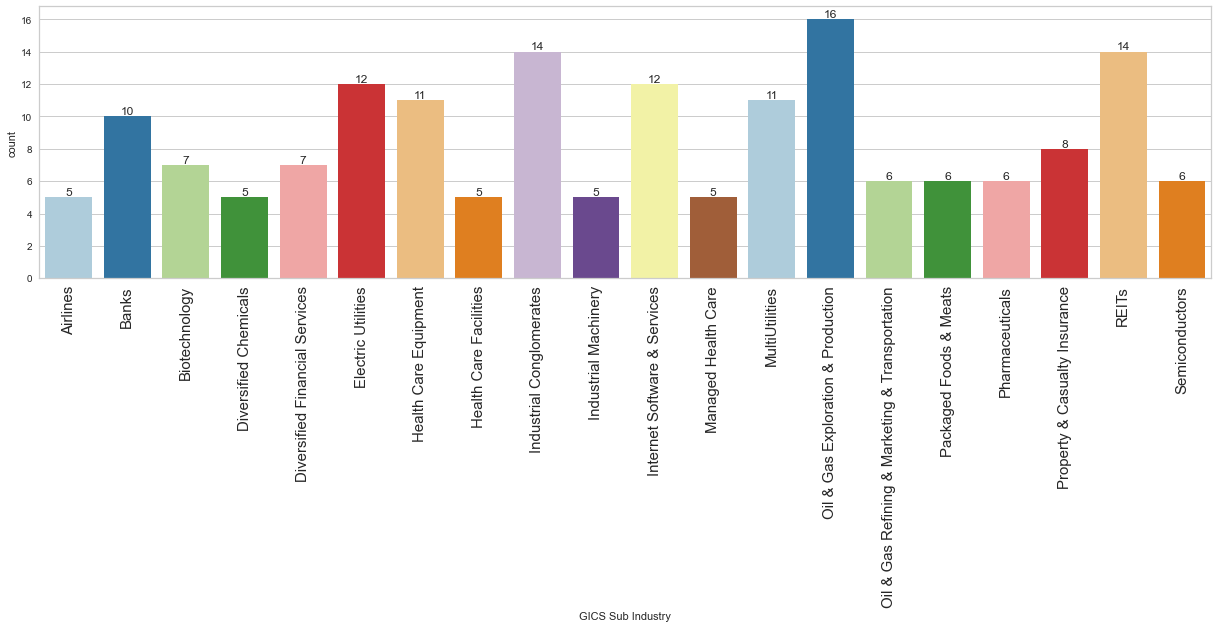

In [24]:
labeled_barplot(df, "GICS Sub Industry", n=20)

- The most common subindustries are Oil&Gas, REITs, and Industrial Conglomerates.

## Bivariate Analysis

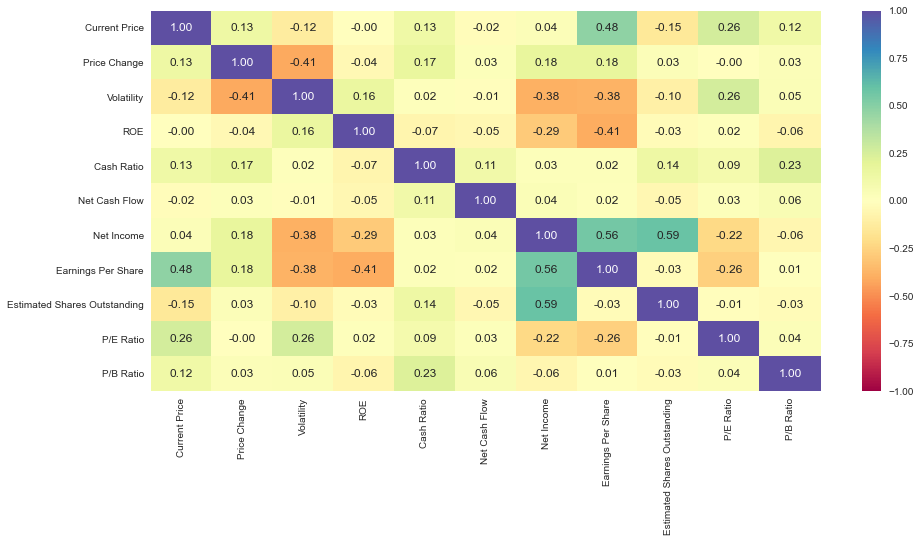

In [25]:
#correlation heatmap
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), 
            annot=True,
            vmin=-1, 
            vmax=1, 
            fmt=".2f",
            cmap="Spectral")
plt.show()

<b>3. How are the different variables correlated with each other?</b>
- Most variables have very low correlation values (so there is little to no correlation between them). 
- Some interesting observations:
    - Net income and volatility show a slightly negative correlation along with earnings per share and ROE. This is also true for volatility and price change percentage. 
    - Current price and earnings per chare seem to be slightly positively correlated with each other. 
    - Net income and earnings per share along with net income and estimated shares outstanding both have moderately high positive correlations. 

<b>Sector vs Price Change</b>

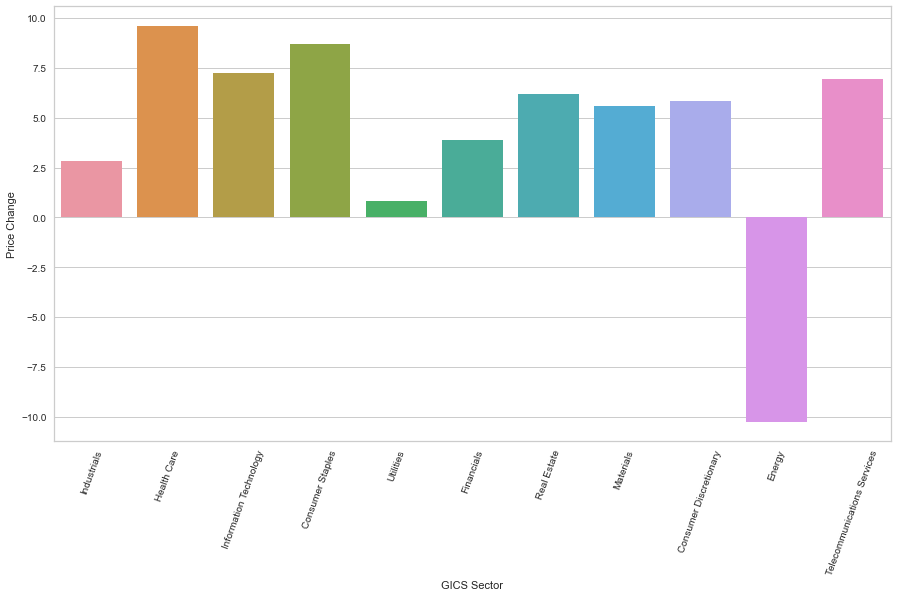

In [26]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x= "GICS Sector", y="Price Change", ci=False)
plt.xticks(rotation=70)
plt.show()

<b> 2. The stocks of which economic sector have seen the maximum price increase on average?</b>
- Stocks in the health care sector have seen the highest price increase on average. This is closely followed by consumer staples. 
- The energy sector is the only sector that has seen a negative average price change. 
- Stock in the utilities sector has shown the smallest overall average price change. 

<b>Sector vs Cash Ratio</b>

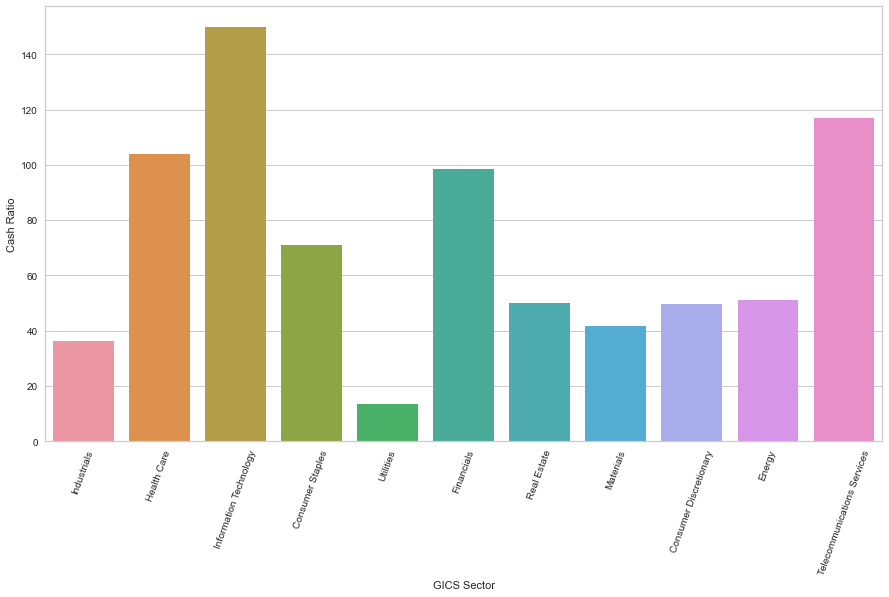

In [27]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x= "GICS Sector", y="Cash Ratio", ci=False)
plt.xticks(rotation=70)
plt.show()

<b>4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?</b>
- Utilities stocks have the smallest average cash ratio values. 
- Information technology stocks have the highest average cash ratio values, followed by telecommunication services. 

<b>Sector vs P/E Ratios</b>

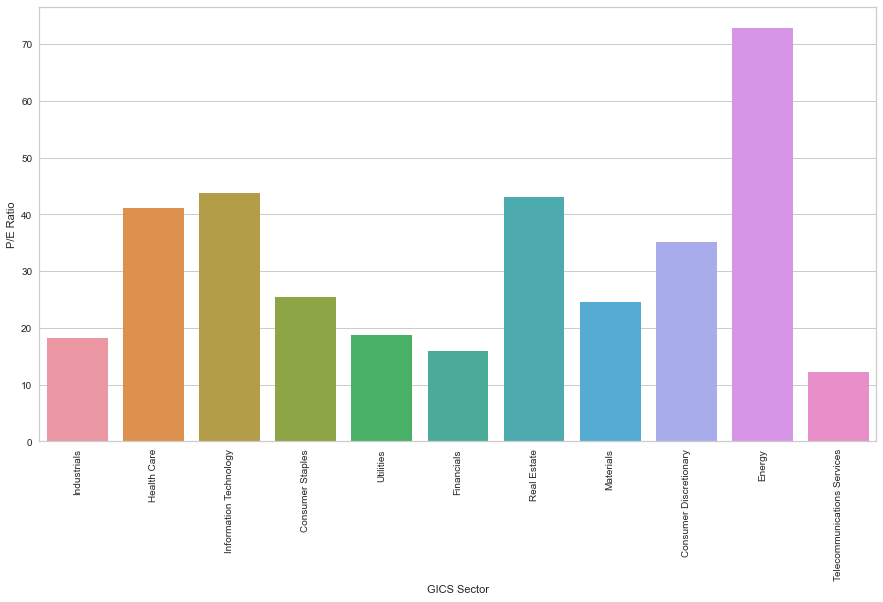

In [28]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x= "GICS Sector", y="P/E Ratio", ci=False)
plt.xticks(rotation=90)
plt.show()

<b>5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?</b>
- The energy sector has the highest average P/E ratio values. 
- Telecom has the lowest average P/E ratio values. 

<b>Sector vs Volatility</b>

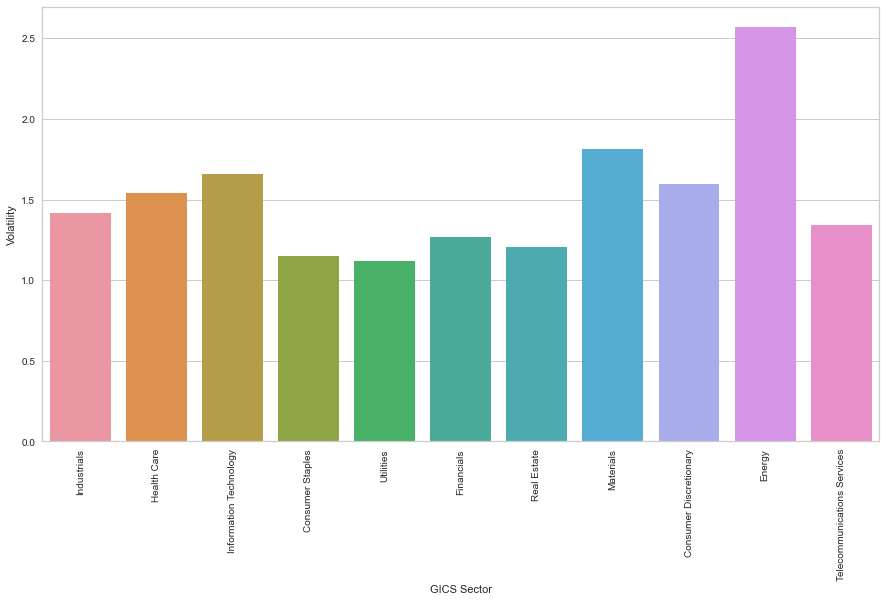

In [29]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x= "GICS Sector", y="Volatility", ci=False)
plt.xticks(rotation=90)
plt.show()

- The energy sector has the highest average volatility. 
- The utilities sector has the lowest volatility, however this is not by much. 

# Data Preprocessing
- Missing value treatment - (not neccessary)
- Outlier check
- Feature engineering
    - Scaling
- Any other preprocessing steps (if needed)

### Outlier Check

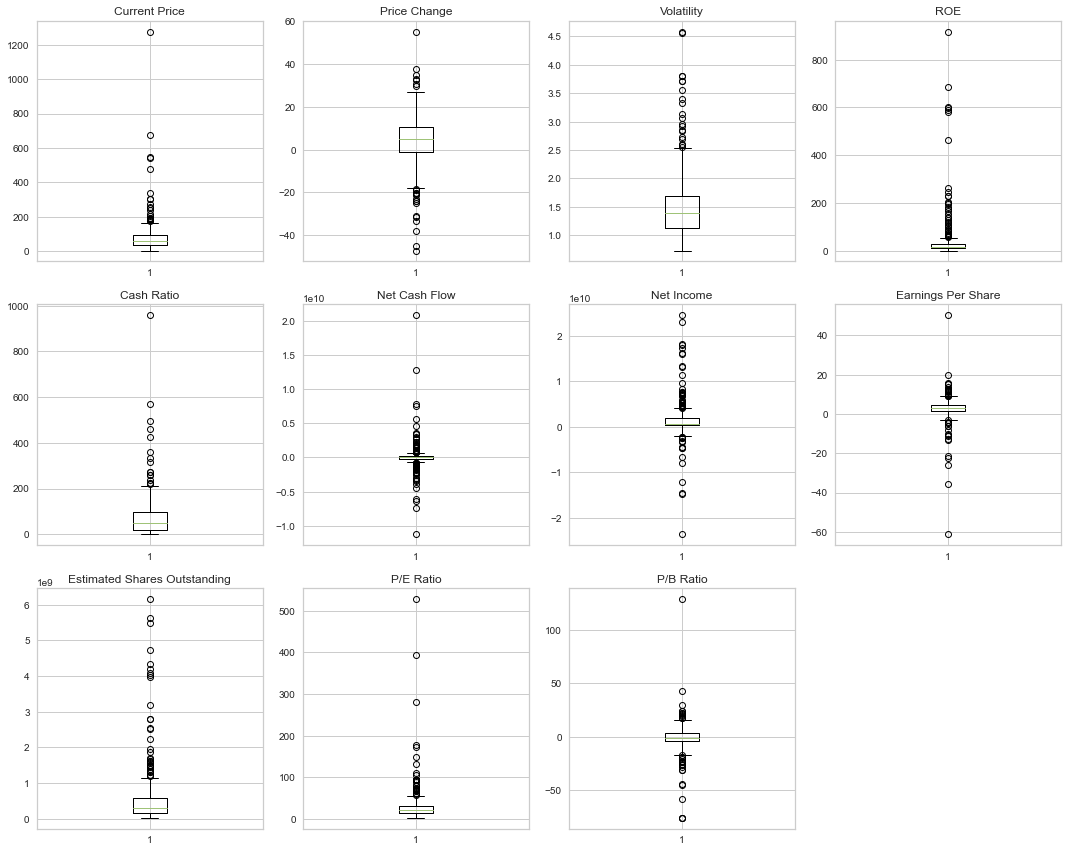

In [30]:
plt.figure(figsize=(15, 12))
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- Many of the outliers seen are simply just very high or very low values and are not errors. None of the values are concerning. The outliers in these variables will be left as is. 

### Scaling
- For clustering (using z score)

In [31]:
#determining the numerical columns that need to be scaled
numeric_columns

['Current Price',
 'Price Change',
 'Volatility',
 'ROE',
 'Cash Ratio',
 'Net Cash Flow',
 'Net Income',
 'Earnings Per Share',
 'Estimated Shares Outstanding',
 'P/E Ratio',
 'P/B Ratio']

In [32]:
#scaling using StandardScaler and creating a dataframe of the scaled data
sc = StandardScaler()
subset_scaled_df = pd.DataFrame(
    sc.fit_transform(df.drop(["Ticker Symbol", "Security", "GICS Sector", "GICS Sub Industry"], axis=1)),
    columns=df.drop(["Ticker Symbol", "Security", "GICS Sector", "GICS Sub Industry"], axis=1).columns,
)
subset_scaled_df.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196


# K-Means Clustering

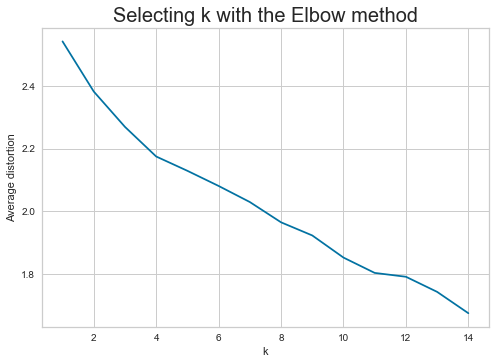

In [33]:
#finding the optimal number of clusters

#making a copy of the scaled subset dataframe to use for k means clustering
k_means_df = subset_scaled_df.copy()

clusters = range(1,15)
meanDistortions=[]

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))/k_means_df.shape[0])
    meanDistortions.append(distortion)
    
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow method', fontsize=20)
plt.show()

- The appropriate value of k seems to be either 4, 5, or 8. 

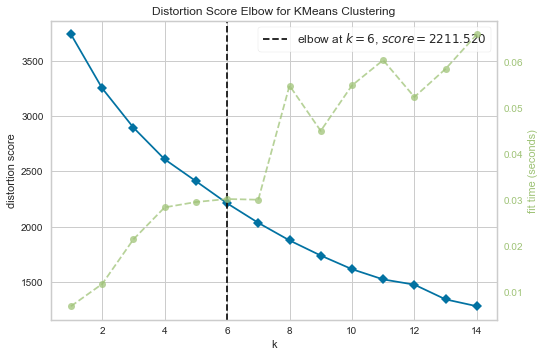

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1,15), timings=True)

#fitting the data to the visualizer
visualizer.fit(k_means_df)
visualizer.show()

- Elbows are seen at 4, 5, and 6. 

### Silhouette Scores

For n_clusters = 2, silhouette score is 0.43969639509980457
For n_clusters = 3, silhouette score is 0.4644405674779403
For n_clusters = 4, silhouette score is 0.4577225970476733
For n_clusters = 5, silhouette score is 0.43228336443659804
For n_clusters = 6, silhouette score is 0.40054227372136175
For n_clusters = 7, silhouette score is 0.3976335364987305
For n_clusters = 8, silhouette score is 0.40278401969450467
For n_clusters = 9, silhouette score is 0.3778585981433699
For n_clusters = 10, silhouette score is 0.13458938329968687
For n_clusters = 11, silhouette score is 0.1421832155528444
For n_clusters = 12, silhouette score is 0.2044669621527429
For n_clusters = 13, silhouette score is 0.23424874810104204
For n_clusters = 14, silhouette score is 0.12102526472829901


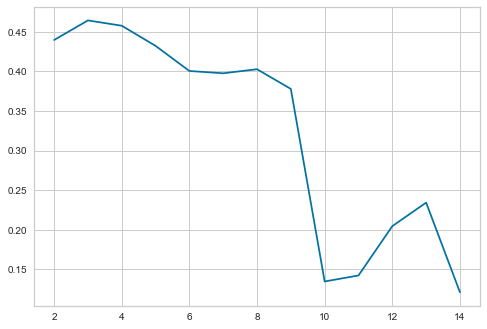

In [35]:
sil_score = []
cluster_list = range(2,15)

for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))
    
plt.plot(cluster_list, sil_score)
plt.show()

- According to the silhouette scores, the best k values are between 3 and 6. 

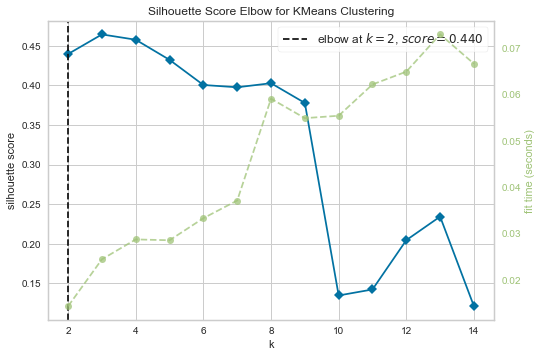

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [36]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,15), metric="silhouette", timings=True)

#fitting the data to the visualizer
visualizer.fit(k_means_df)
visualizer.show()

- Trying k=4, 5, and 8

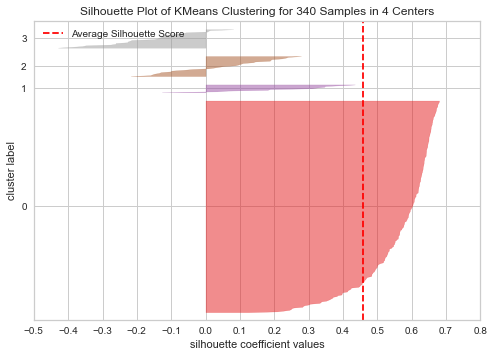

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [37]:
#finding the optimal no of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

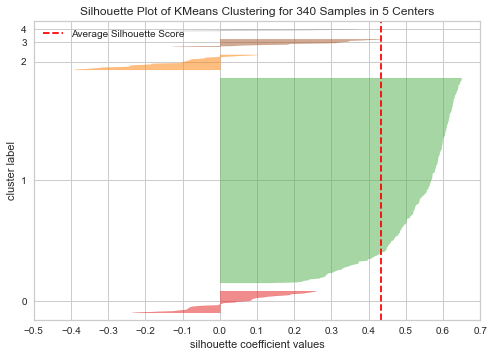

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [38]:
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

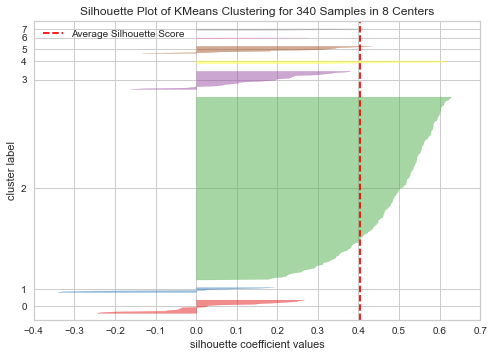

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [39]:
visualizer = SilhouetteVisualizer(KMeans(8, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

### k=4 will be used as the number of clusters moving forward as the silhouette score is high at 0.458 and there is a kink at the elbow curve. 

In [40]:
#final K-means model
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(k_means_df)

KMeans(n_clusters=4, random_state=1)

In [41]:
#creating a copy of the original data 
#then adding the kmeans cluster labels to the original dataframe and the scaled dataframe
df1 = df.copy()

k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

### Cluster Profiling

In [42]:
#finding the means of the clusters
km_cluster_profile = df1.groupby("KM_segments").mean()

In [43]:
#grouping the cluster labels by "Security"
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["Security"].count().values)

In [44]:
#displaying the cluster profiles
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
KM_segments,,,,,,,,,,,,
0,72.399112,5.066225,1.388319,34.620939,53.000000,-14046223.826715,1482212389.891697,3.621029,438533835.667184,23.843656,-3.358948,277
1,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
2,38.099260,-15.370329,2.910500,107.074074,50.037037,-159428481.481481,-3887457740.740741,-9.473704,480398572.845926,90.619220,1.342067,27
3,234.170932,13.400685,1.729989,25.600000,277.640000,1554926560.000000,1572611680.000000,6.045200,578316318.948800,74.960824,14.402452,25


- This table highlights the cluster that contains the highest average value of each variable. 
    - For example, cluster 0 does not have the highest values in any of the categories besides count. This tells us that this cluster is the largest and most broad, and generally average across the board. 

In [45]:
#companies in each cluster
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castl

In [46]:
#listing the sectors within each cluster
df1.groupby(["KM_segments", "GICS Sector"])['Security'].count()

KM_segments  GICS Sector                
0            Consumer Discretionary         33
             Consumer Staples               17
             Energy                          6
             Financials                     45
             Health Care                    29
             Industrials                    52
             Information Technology         24
             Materials                      19
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
1            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      3
             Health Care                     2
             Information Technology          1
             Telecommunications Services     2
2            Energy                         22
             Industrials                     1
             Inform

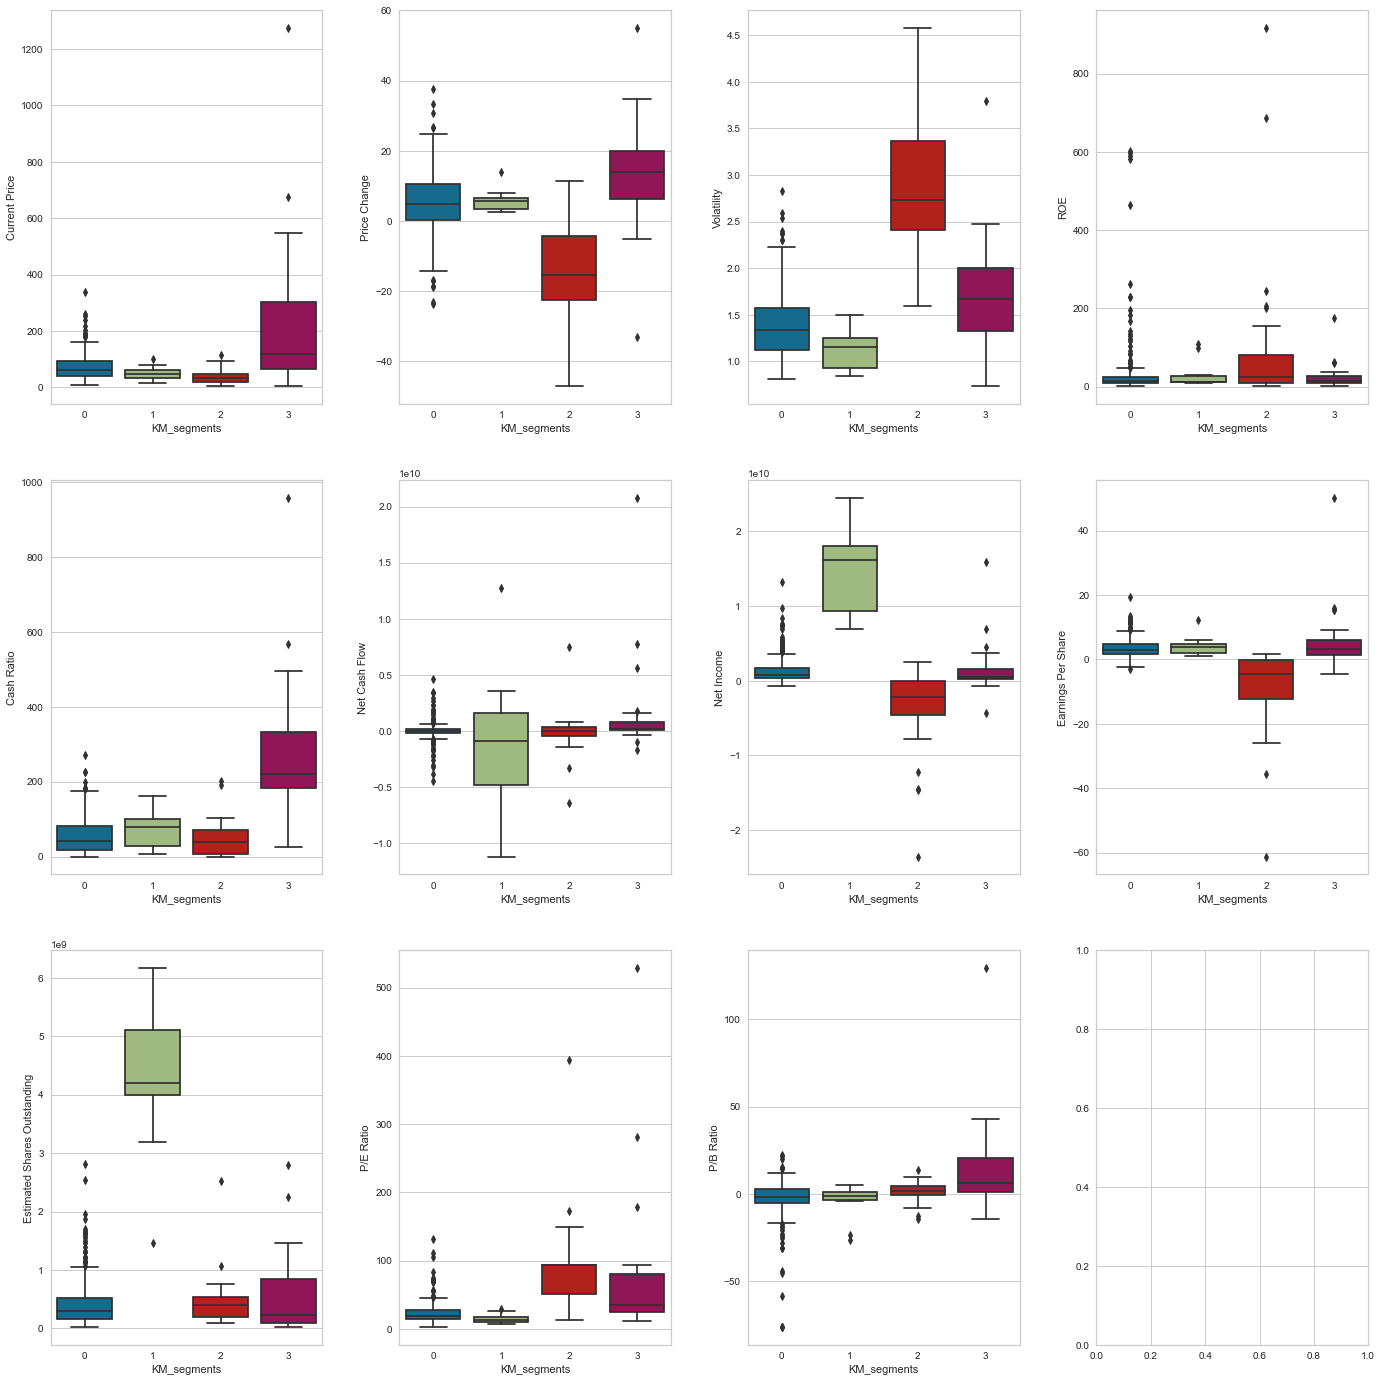

In [47]:
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 11:
            sns.boxplot(
                ax=axes[ii][jj],
                data=df1,
                y=df1.columns[4+counter],
                x="KM_segments",
            )
            counter = counter + 1

fig.tight_layout(pad=3.0)

- For most of the attributes, each cluster is distinctly different from the others. 

# Hierarchical Clustering

In [48]:
#creating a copy of the scaled subset dataframe to use for hierarchical clustering
hc_df = subset_scaled_df.copy()

In [49]:
#list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

#list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print("Cophenetic correlation for {} distance and {} linkage is {}.".format(
            dm.capitalize(), lm, c))
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259195530524591.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850004.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159737.
Cophenetic correl

In [50]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]))

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


<b>Exploring different linkage methods with Euclidean distance only.</b>

In [51]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.


In [52]:
#printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]))

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


<b>The cophenetic correlation is at a maximum with Euclidean distance and average linkage.</b>

<b>Visualizing the dendrogras for the different linkage methods with Euclidean distance</b>

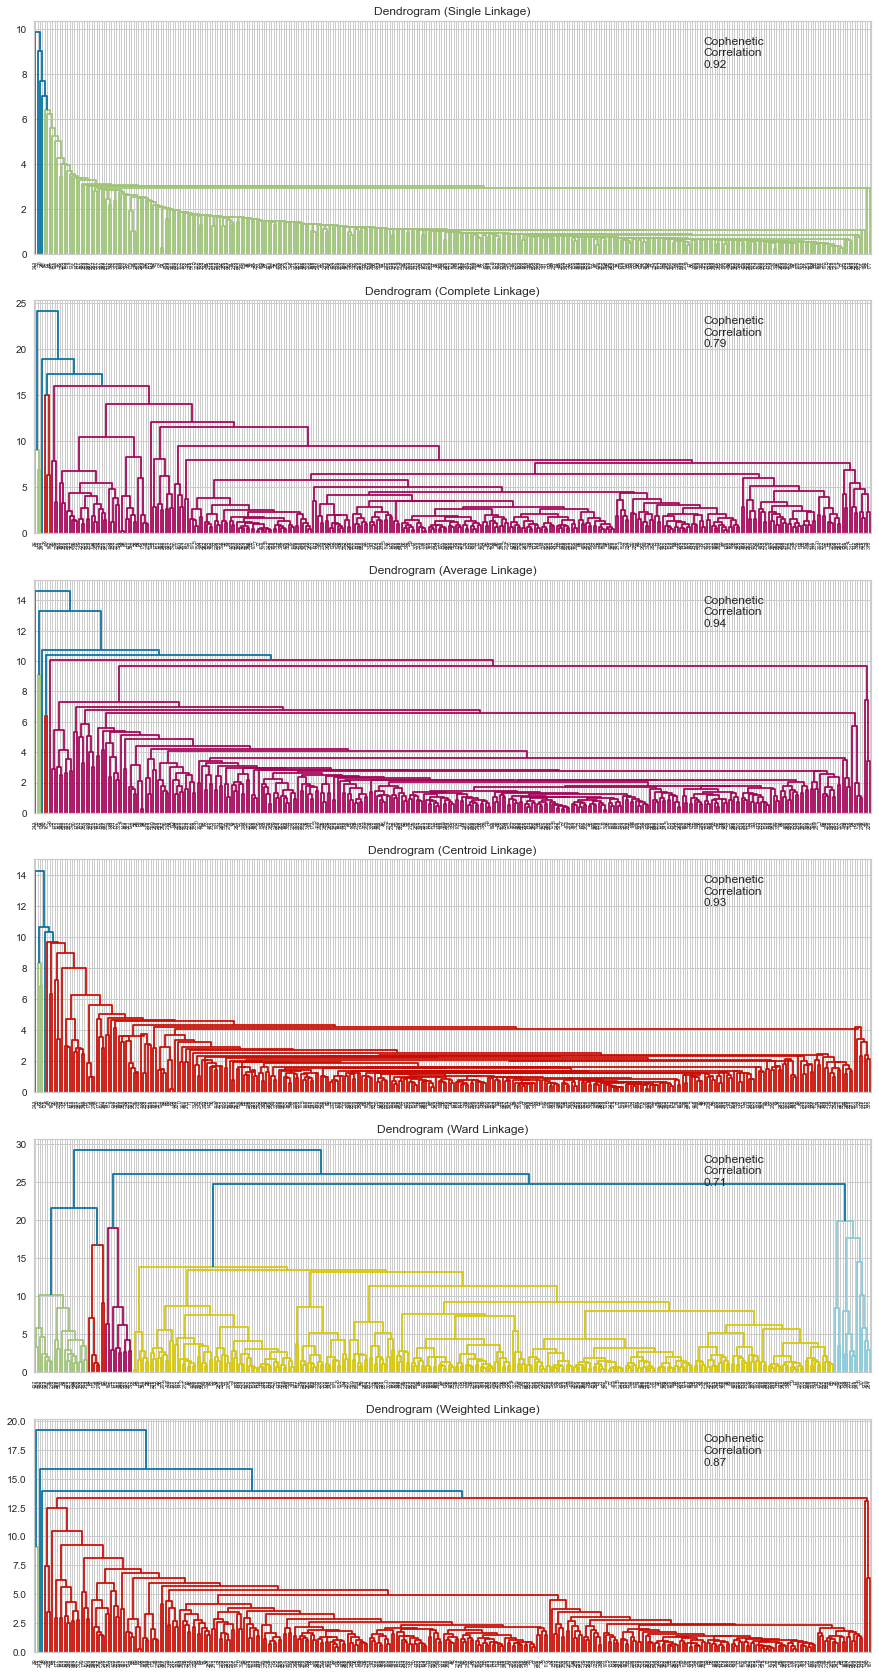

In [53]:
#list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

#lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

#enumerating through the list of linkage methods above
#for each linkage method, dendrogram will be plotted and the cophenetic correlation will be calculated
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction")
    
    compare.append([method, coph_corr])

In [54]:
#creating a new dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
4,ward,0.710118
1,complete,0.787328
5,weighted,0.869378
0,single,0.923227
3,centroid,0.931401
2,average,0.942254


- The cophenetic correlation is highest for average and centroid linkage methods.
- Average linkage will be used moving forward.
- 6 appears to be the appropriate number of clusters from the dendrogram for average linkage.
    - If a horizontal line is drawn on the average linkage dendrogram at the portion of the tree with the first few major splits in the pink region, this level has 6 clusters. 

In [55]:
HCmodel = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="average")
HCmodel.fit(hc_df)

AgglomerativeClustering(linkage='average', n_clusters=6)

In [56]:
#creating a copy of the original dataframe 
#then adding the heirarchical cluster labels to the original and scaled dataframes
df2 = df.copy()

hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

### Cluster Profiling

In [57]:
#finding the means of the clusters
hc_cluster_profile = df2.groupby("HC_segments").mean()

In [58]:
#grouping the cluster labels by "Security"
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Security"].count().values)

In [59]:
#displaying the cluster profiles
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,77.287589,4.099730,1.518066,35.336336,66.900901,-33197321.321321,1538074666.666667,2.885270,560505037.293543,32.441706,-2.174921,333
1,25.640000,11.237908,1.322355,12.500000,130.500000,16755500000.000000,13654000000.000000,3.295000,2791829362.100000,13.649696,1.508484,2
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2
3,104.660004,16.224320,1.320606,8.000000,958.000000,592000000.000000,3669000000.000000,1.310000,2800763359.000000,79.893133,5.884467,1
4,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,1
5,276.570007,6.189286,1.116976,30.000000,25.000000,90885000.000000,596541000.000000,8.910000,66951851.850000,31.040405,129.064585,1


- This table highlights the cluster that contains the highest average value of each variable. 
    - For example, cluster 0 does not have the highest values in any of the categories besides count. This tells us that this cluster is the largest and most broad, and generally average across the board. 

In [60]:
#companies in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Alexion Pharmaceuticals' 'Applied Materials Inc' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Amgen Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.'
 'Aon plc' 'Anadarko Petroleum Corp' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'Baker Hughes Inc' 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.'
 'Ball 

In [61]:
#listing the sectors within each cluster
df2.groupby(["HC_segments", "GICS Sector"])['Security'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary         39
             Consumer Staples               19
             Energy                         28
             Financials                     48
             Health Care                    40
             Industrials                    53
             Information Technology         30
             Materials                      20
             Real Estate                    27
             Telecommunications Services     5
             Utilities                      24
1            Financials                      1
             Information Technology          1
2            Energy                          2
3            Information Technology          1
4            Consumer Discretionary          1
5            Information Technology          1
Name: Security, dtype: int64

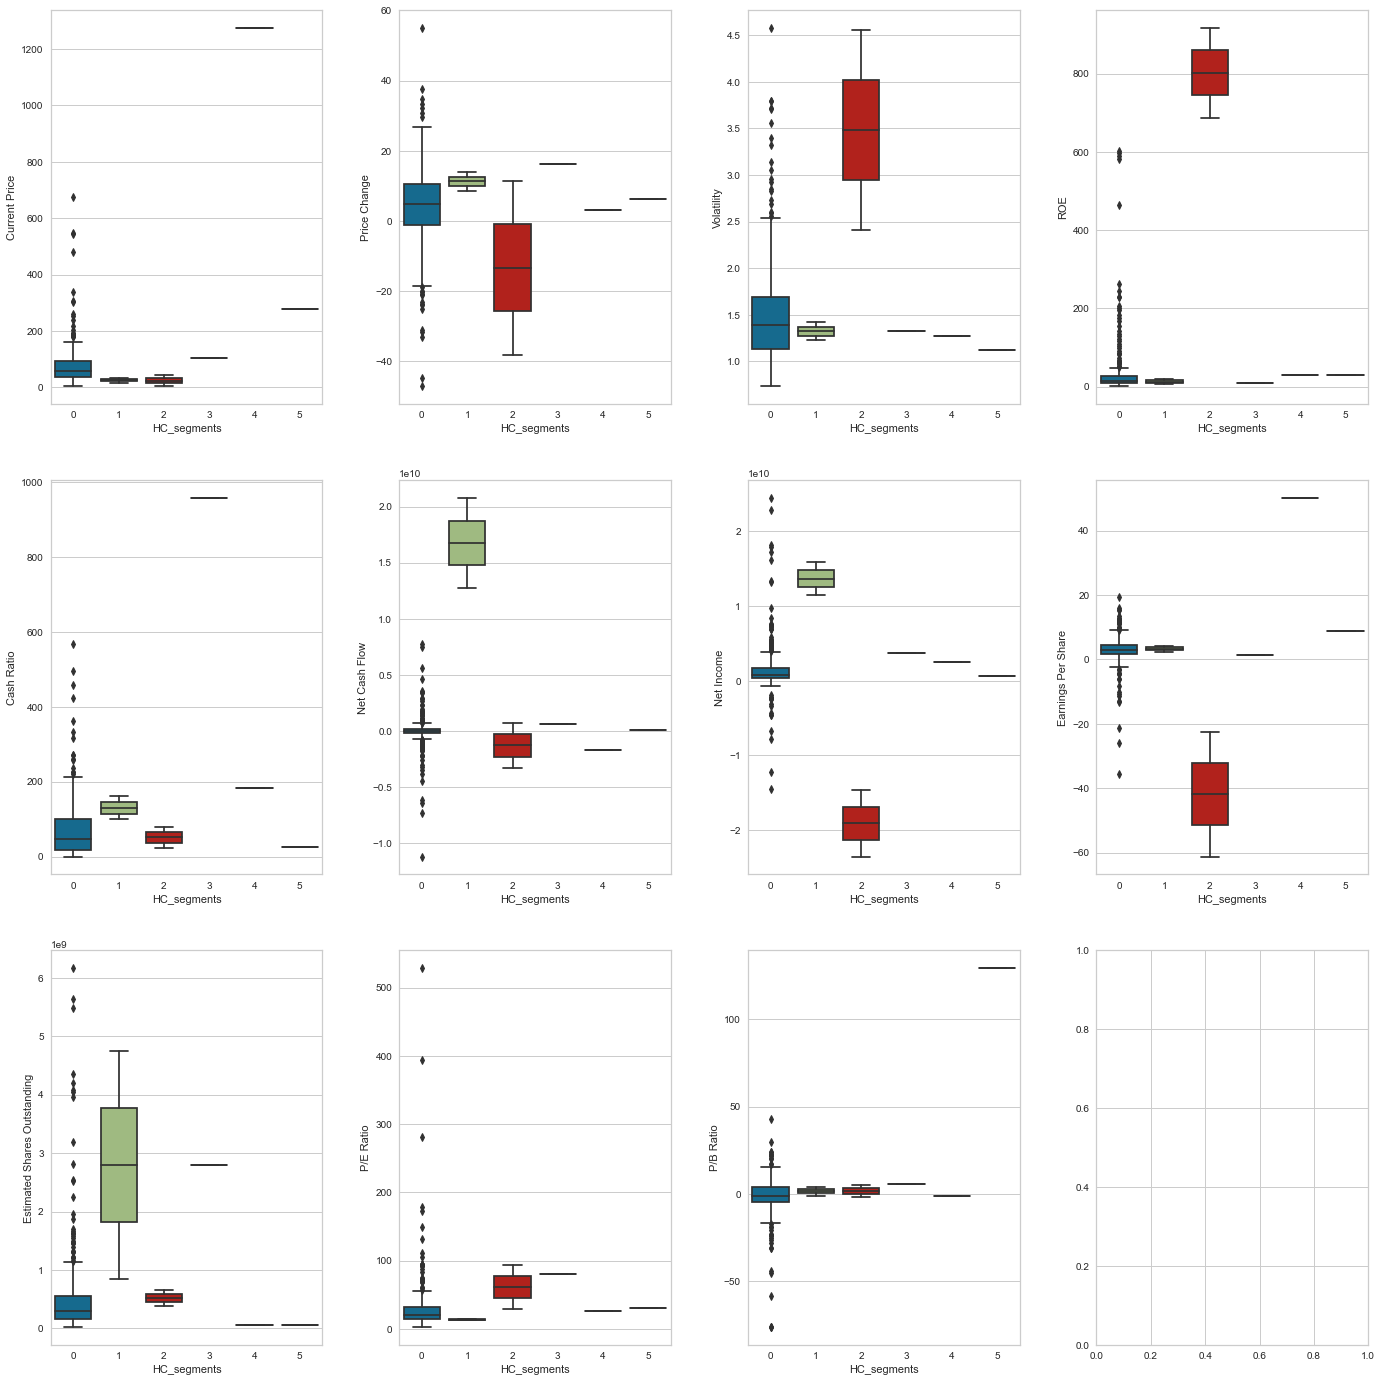

In [62]:
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 11:
            sns.boxplot(
                ax=axes[ii][jj],
                data=df2,
                y=df2.columns[4+counter],
                x="HC_segments",
            )
            counter = counter + 1

fig.tight_layout(pad=3.0)

- Given these boxplots, visually most of the clusters are distinctly different from one another. 

# K-Means vs Hierarchical Clustering
- Which clustering technique took less time for execution?
    - Hierarchical Clustering took less time to execute since most of the calculations for cophenetic correlation values, etc. were done automatically. K-Means clustering took more manual interpretation to teak the variables which was a little bit more time consuming. 
    - Computationally, hierarchical clustering took a bit more time compared to K-Means. 
- Which clustering technique gave you more distinct clusters, or are they the same?
    - Hierarchical clustering provided more distinctly different clusters but the clusters themselves were very different sizes. 
- How many observations are there in the similar clusters of both algorithms?
    - 4 clusters were defined by the K-Means Clustering method. These 4 clusters had 277, 11, 27, and 25 observations each. 
    - 6 clusters were defined by the Hierarchical Clustering method. These 6 clusters had 333, 2, 2, 1, 1, and 1 observations. 
    - All in all, the hierachical clustering method is not as useful for application moving forward since a huge majority of the data points fall within 1 cluster and only a few outliers fall in the other 5 clusters. 
- How many clusters are obtained as the appropriate number of clusters from both algorithms?
    - 4 clusters for K-Means and 6 clusters for Hierarchical. 

# Actionable Insights and Recommendations

- K-Means clustering separates the data into a fewer number of larger clusters with a bit higher variability in comparison to Hierarchical clustering. Hierarchical clusters separates the data into essentially 1 large cluster with high variability and a few very specific, very small clusters.
    - Overall, K-Means clusters cover more GISC sectors within each cluster. 
    - The clusters grouped using Hierarchical clustering have very high variability in cluster 0 but the other clusters only contain stocks from 1-2 GICS sectors. 
- K-Means clustering is a bit more practical in application for this reason. 
- Using K-Means Clustering, there are 4 groups of stocks that someone could invest in, each containing groups of stocks with similar attributes. 
    - Cluster 0:
        - More general and average for every category.
          - Middle of the pack in terms of current price, volatility, ROE, etc. 
        - Large overall number of stocks. 
        - Lower earnings per share compared to other clusters but average volatility. 
        - Encompasses many different GICS sectors. 
    - Cluster 1:
        - The highest average net income and the highest average number of outstanding shares. 
        - The lowest average volatility and a moderate current price point. 
        - The smallest overall number of stocks. 
    - Cluster 2: 
        - High volatility and high ROE. 
        - Moderate overall number of stocks. 
        - Lowest current price point. 
    - Cluster 3: 
        - Highest current price point with the highest average price change. 
        - Highest average earnings per share
        - Moderately high volatility with a moderate overall number of shares. 
- A consumer can choose one or more groups of stocks to invest in depending on several factors that fit their lifestyle and goals. For example, if they want a high ROE and do not mind the high volatility, they should invest in the stocks in cluster 2. If someone wants a large number of stocks to invest in with average ROE, average current price, and relatively low volatility because they want to keep these investments for a very long time, they should invest in the many stocks that are in cluster 0. 

In [63]:
#displaying the k-means cluster profiles - copied from the same cell above
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
KM_segments,,,,,,,,,,,,
0,72.399112,5.066225,1.388319,34.620939,53.000000,-14046223.826715,1482212389.891697,3.621029,438533835.667184,23.843656,-3.358948,277
1,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
2,38.099260,-15.370329,2.910500,107.074074,50.037037,-159428481.481481,-3887457740.740741,-9.473704,480398572.845926,90.619220,1.342067,27
3,234.170932,13.400685,1.729989,25.600000,277.640000,1554926560.000000,1572611680.000000,6.045200,578316318.948800,74.960824,14.402452,25
